# 프로젝트 : 고양이 수염 스티커 만들기

In [102]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### 이미지 불러오기

In [103]:
def getImage(file_name):
    my_image_path = os.getenv('HOME')+ '/' + file_name
    img_bgr = cv2.imread(my_image_path)
    print('\n✔️ 이미지 가져오기 : ', file_name)
    
    return img_bgr

# getImage('profile3.jpeg')

### 얼굴 검출 & 랜드마크 검출하기

In [104]:
def getFaceDetector(img_bgr, img_show, show=False):
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_bgr, 1)
    
    print('\n✔️ 얼굴 검출')
    print('dlib_rects : ', dlib_rects)
    
    if show == True:
        for dlib_rect in dlib_rects:
            l = dlib_rect.left()
            t = dlib_rect.top()
            r = dlib_rect.right()
            b = dlib_rect.bottom()

            cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()
    
    return dlib_rects

In [105]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [106]:
def getLandmarks(img_bgr, dlib_rects, img_show, show=False):
    list_landmarks = []
    
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_bgr, dlib_rect) 
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    print('\n✔️ 랜드마크 검출')
#     print(len(list_landmarks[0]))

    if show == True:
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img_show, point, 3, (255, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()
       
    return list_landmarks

### 스티커 적용 위치 확인하기

In [115]:
def findPosition(dlib_rects, list_landmarks):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1]
        w = h = dlib_rect.width()
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))
    print('\n✔️ 스티커 중간 위치 찾기')
    
    return x, y, w, h

def getSticker(sticker_path):
    sticker_path = os.getenv('HOME')+'/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path)
    print('\n✔️ 스티커 이미지 가져오기')
    
    return img_sticker

def resizeSticker(img_sticker, x, y, w, h):
    img_sticker = cv2.resize(img_sticker, (w,h))
    refined_x = x - w // 2
    refined_y = y - h // 2
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        print(-refined_y)
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
        
    print('\n✔️ 스티커 리사이즈')
    print('img_sticker.shape : ', img_sticker.shape)
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
    return img_sticker, refined_x, refined_y

### 스티커 적용하기

In [119]:
def applySticker(img_bgr, img_sticker, refined_x, refined_y):
    img = img_bgr.copy()
    sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
    
    print('\n✔️ 스티커 적용') 
    return img

### 이미지에 스티커 붙이는 함수(makeStickerImg) 작성

In [109]:
def makeStickerImg(img_path, show=False):
    img_bgr = getImage(img_path)

    img_show = img_bgr.copy()

    dlib_rects = getFaceDetector(img_bgr, img_show, show)

    list_landmarks = getLandmarks(img_bgr, dlib_rects, img_show, show)

    [x, y, w, h] = findPosition(dlib_rects, list_landmarks)
    

    if show == True:
        # 스티커 중앙 위치 보여주기
        cv2.circle(img_show, (x,y), 5, (0, 255, 0), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()

        
    img_sticker = getSticker('cat-whiskers.png')

    [refined_img_sticker, refined_x, refined_y] = resizeSticker(img_sticker, x, y, w, h)

    img_bgr_with_sticker = applySticker(img_bgr, refined_img_sticker, refined_x, refined_y)
    
    return cv2.addWeighted(img_bgr, 0.5, img_bgr_with_sticker, 0.5, 0)

### makeStickerImg 함수 실행


✔️ 이미지 가져오기 :  profile2.jpg

✔️ 얼굴 검출
dlib_rects :  rectangles[[(139, 180) (324, 366)]]


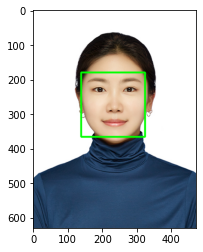


✔️ 랜드마크 검출


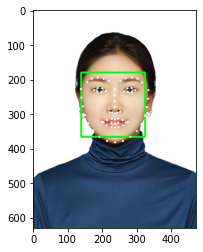

(x,y) : (236,279)
(w,h) : (186,186)

✔️ 스티커 중간 위치 찾기


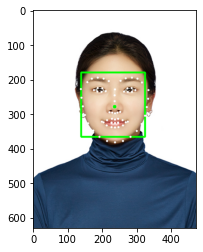


✔️ 스티커 이미지 가져오기
(x,y) : (143,186)

✔️ 스티커 리사이즈
img_sticker.shape :  (186, 186, 3)
(x,y) : (143,186)

✔️ 스티커 적용


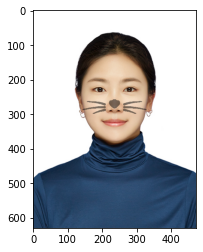

In [83]:
img = makeStickerImg('profile2.jpg', True)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 다른 이미지들로 추가 테스트


✔️ 이미지 가져오기 :  test4.JPG

✔️ 얼굴 검출
dlib_rects :  rectangles[[(2228, 893) (2302, 967)]]

✔️ 랜드마크 검출
(x,y) : (2260,934)
(w,h) : (75,75)

✔️ 스티커 중간 위치 찾기

✔️ 스티커 이미지 가져오기
(x,y) : (2223,897)

✔️ 스티커 리사이즈
img_sticker.shape :  (75, 75, 3)
(x,y) : (2223,897)

✔️ 스티커 적용


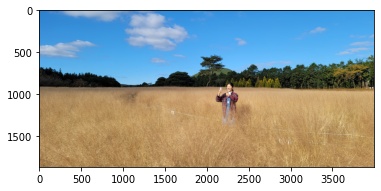

In [120]:
img = makeStickerImg('test4.JPG')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

---

# 발견한 문제점들

### # 얼굴의 각도, 기울임 정도의 민감도

##### Case1. 얼굴이 정면 + 살짝 기울였을 때, 스티커가 함께 기울어지지 않아 어색하게 보입니다.
<img src='profile1_result.png' width='40%' height='40%'/>

##### Case2. "옆으로 누운 얼굴" 사진으로 했을 때, bounding box를 찾지 못해 실패했습니다.
<img src='test1_result.png' width='40%' height='40%'/>

##### Case3. 얼굴을 정면이 아닌 옆으로 살짝 비켰을 때, 코 위치를 정상적으로 잡아내지 못했습니다.
<img src='test3_result.png' width='40%' height='40%'/>

##### 본 모델은 얼굴의 각도, 기울임 정도에 민감도가 높아, 얼굴이 정면이 아닌 경우 이미지가 정상적으로 처리되기 어렵습니다.

1. 이목구비를 잘못 인식하는 문제
2. 아예 bounding box를 찾지 못하는 문제
3. 잘 인식하더라도 스티커 위치가 어색하게 위치하는 문제


### # 스티커앱의 정확도

##### 스티커앱을 만들때, 정확도는 중요합니다. 

정확도가 모든 이미지에 중요하다곤 생각하지 않습니다. 

멀리 있는 이미지까지 정확하게 스티커를 붙인다고 해도

아래와 같이 너무 멀리 있는 사진에 스티커는 보이지 않을 뿐더러, 그렇게 중요한 issue가 되진 않습니다.

<img src='test4_result.png' width='40%' height='40%'/>

그러나 얼굴이 화면에서 약 20% 이상 차지하는 이미지의 경우에는 다릅니다. 

각도나 기울임이 어떻든지간에 스티커가 자연스럽게 잘 붙어야 스티커앱이라고 할 수 있어서 

(얼굴이 멀리 있지않은) 이미지의 경우 정확도가 중요하다 생각합니다.

---

# 회고

### 1. 어려웠던 점
- 이미지 픽셀 단위로 처리하는 부분이 아직 많이 낯섭니다. 그래서 그런지 스티커를 적용하는 부분 코드를 이해하기가 어려웠습니다.

### 2. 알아낸 점 혹은 아직 모호한 점

##### 알아낸 점
- 처음 cv2로 읽으면 이미지가 BGR로 되어있어서, 매번 RGB로 바꾸고 그 상태에서 이미지 처리를 해야한다 생각했는데요,
    BGR 기준으로 이미지 처리들을 하고, 마지막에 한번만 RGB로 바꿔주어도 정상적으로 처리되는 것을 알 수 있었습니다.

- 이미지는 0,0이 왼쪽 상단에 위치한다는 것을 알수있었습니다.

- ```img_sticker==0```에 0 값이 인덱스 값이 아니라, 255(흰색), 0(검정) 이라는 것을 알았습니다.

##### 모호한 점
- sticker_area 값 설정하는 부분이 모호합니다. (스티커 적용하는 부분)

### 3. 시도한 것들
- 고양이 코를 찍는걸 잘못 이해해서 인중 한가운데를 찍어보기도 했습니다. (33과 51 사이 위치 값 도출)
- 이미지 별 사이즈가 달라 특정 이미지에서는 rect, circle, 스티커가 잘 안보이기도 했습니다. 이런 경우 두께를 두껍게 하거나, 스티커 크기를 강제로 퐉 키워 눈으로 확인할 수 있었습니다.

### 4. 루브릭 지표를 달성하지 못한 부분과 이유
- 루브릭 지표 모두 달성했습니다.

### 5. 자기 다짐
- 이번에 겪은 시행착오는 대부분 **제공된 코드에 의지하고 실제 데이터(픽셀, 위치) 이해가 부족하여** 제자리 걸음이 많았습니다.
- 다음에는 꼭 **'이미지 처리하는 라이브러리 메서드 하나하나 잘 이해하고, 이해가 안되면 자주 print찍어보자'** 생각하게 되었습니다.